In [ ]:
# importando bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
# escolhendo o estilo de visualização dos graficos
plt.style.use("seaborn")

In [ ]:
# realizando o upload de arquivo
from google.colab import files
arq = files.upload()

Saving Sales.xlsx to Sales (2).xlsx


In [ ]:
# lendo um arquivo para criar um dataframe
df = pd.read_excel('Sales.xlsx')

In [ ]:
# formata o panda para exibir todas a informações com 2 casas decimais
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
# visualizando as 5 primeiras linhas do arquivo selecionado
df.head()

,OrderDate,OrderDateKey,ProductKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,ShipDate,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,RegionMonthID
0,2003-09-29,20030929,528,16115,4,SO55161,1,2003-10-06,1,4.99,4.99,0,0,1.87,1.87,4.99,0.40,0.12,Southwest9
1,2003-10-01,20031001,528,15307,4,SO55352,1,2003-10-08,1,4.99,4.99,0,0,1.87,1.87,4.99,0.40,0.12,Southwest10
2,2003-10-05,20031005,528,16003,4,SO55578,1,2003-10-12,1,4.99,4.99,0,0,1.87,1.87,4.99,0.40,0.12,Southwest10
3,2003-10-06,20031006,528,15883,4,SO55635,1,2003-10-13,1,4.99,4.99,0,0,1.87,1.87,4.99,0.40,0.12,Southwest10
4,2003-10-08,20031008,528,15368,4,SO55767,1,2003-10-15,1,4.99,4.99,0,0,1.87,1.87,4.99,0.40,0.12,Southwest10


In [ ]:
# visualizar a quantidade de linhas e colunas do arquivo 
df.shape

(60398, 19)

In [ ]:
df.dtypes

OrderDate               datetime64[ns]
OrderDateKey                     int64
ProductKey                       int64
CustomerKey                      int64
SalesTerritoryKey                int64
SalesOrderNumber                object
SalesOrderLineNumber             int64
ShipDate                datetime64[ns]
OrderQuantity                    int64
UnitPrice                      float64
ExtendedAmount                 float64
UnitPriceDiscountPct             int64
DiscountAmount                   int64
ProductStandardCost            float64
TotalProductCost               float64
SalesAmount                    float64
TaxAmt                         float64
Freight                        float64
RegionMonthID                   object
dtype: object

In [ ]:
# visualizar o valor total das vendas
soma_venda = df['SalesAmount'].sum()
print(f'{soma_venda:,.2f}')

29,358,677.22


In [ ]:
#criando o campo CustoTotal
df['CustoTotal'] = df['ProductStandardCost'].mul(df['OrderQuantity'])


In [ ]:
df.head(1)

,OrderDate,OrderDateKey,ProductKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,ShipDate,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,RegionMonthID,CustoTotal
0,2003-09-29,20030929,528,16115,4,SO55161,1,2003-10-06,1,4.99,4.99,0,0,1.8663,1.8663,4.99,0.3992,0.1248,Southwest9,1.8663


In [ ]:
df.dtypes

OrderDate               datetime64[ns]
OrderDateKey                     int64
ProductKey                       int64
CustomerKey                      int64
SalesTerritoryKey                int64
SalesOrderNumber                object
SalesOrderLineNumber             int64
ShipDate                datetime64[ns]
OrderQuantity                    int64
UnitPrice                      float64
ExtendedAmount                 float64
UnitPriceDiscountPct             int64
DiscountAmount                   int64
ProductStandardCost            float64
TotalProductCost               float64
SalesAmount                    float64
TaxAmt                         float64
Freight                        float64
RegionMonthID                   object
CustoTotal                     float64
dtype: object

In [ ]:
custo_total = round(df['CustoTotal'].sum(),2)
custo_total

17277793.58

In [ ]:
# calculando o lucro na venda
df['LucroTotal'] = round(df['SalesAmount']-df['TotalProductCost'],2)

In [ ]:
df.head(1)

,OrderDate,OrderDateKey,ProductKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,ShipDate,OrderQuantity,UnitPrice,...,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,RegionMonthID,CustoTotal,LucroTotal
0,2003-09-29,20030929,528,16115,4,SO55161,1,2003-10-06,1,4.99,...,0,0,1.8663,1.8663,4.99,0.3992,0.1248,Southwest9,1.8663,3.0


In [ ]:
# calculando a soma dos lucros 
# se não tivesse a configuração do panda para 2 casas decimais, o round faria isso
lucro_total = round(df['LucroTotal'].sum(),2)
lucro_total

12080819.83

In [ ]:
df['TotalDias'] = df['ShipDate']-df['OrderDate']

In [ ]:
df.head(1)

,OrderDate,OrderDateKey,ProductKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,ShipDate,OrderQuantity,UnitPrice,...,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,RegionMonthID,CustoTotal,LucroTotal,TotalDias
0,2003-09-29,20030929,528,16115,4,SO55161,1,2003-10-06,1,4.99,...,0,1.8663,1.8663,4.99,0.3992,0.1248,Southwest9,1.8663,3.12,7 days


In [ ]:
df['TotalDias'] = (df['ShipDate']-df['OrderDate']).dt.days

In [ ]:
df.head(1)

,OrderDate,OrderDateKey,ProductKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,ShipDate,OrderQuantity,UnitPrice,...,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,RegionMonthID,CustoTotal,LucroTotal,TotalDias
0,2003-09-29,20030929,528,16115,4,SO55161,1,2003-10-06,1,4.99,...,0,1.8663,1.8663,4.99,0.3992,0.1248,Southwest9,1.8663,3.12,7


In [ ]:
# media de dias para entrega
media_dias = df['TotalDias'].mean()
media_dias

7.0

In [ ]:
# exibindo media por marca
df.groupby('SalesTerritoryKey')['TotalDias'].mean()

SalesTerritoryKey
1     7.0
2     7.0
3     7.0
4     7.0
5     7.0
6     7.0
7     7.0
8     7.0
9     7.0
10    7.0
Name: TotalDias, dtype: float64

In [ ]:
#verificando se existe valores nulos
df.isnull().sum()

OrderDate               0
OrderDateKey            0
ProductKey              0
CustomerKey             0
SalesTerritoryKey       0
SalesOrderNumber        0
SalesOrderLineNumber    0
ShipDate                0
OrderQuantity           0
UnitPrice               0
ExtendedAmount          0
UnitPriceDiscountPct    0
DiscountAmount          0
ProductStandardCost     0
TotalProductCost        0
SalesAmount             0
TaxAmt                  0
Freight                 0
RegionMonthID           0
CustoTotal              0
LucroTotal              0
TotalDias               0
dtype: int64

In [ ]:
# agrupando lucro por ano e territorio
df.groupby([df['OrderDate'].dt.year, 'SalesTerritoryKey'])['LucroTotal'].sum()

OrderDate  SalesTerritoryKey
2001       1                             165,983.01
           4                             273,055.50
           6                              58,711.31
           7                              72,463.62
           8                              95,573.75
           9                             528,570.65
           10                            117,251.63
2002       1                             342,058.00
           4                             517,552.80
           5                                 296.28
           6                             247,731.01
           7                             208,184.17
           8                             210,361.29
           9                             879,861.02
           10                            240,808.53
2003       1                             466,772.59
           2                               1,697.41
           3                               1,226.61
           4                       

In [ ]:
# agrupando lucro por ano e territorio e indexando
lucro_ano = df.groupby([df['OrderDate'].dt.year, 'SalesTerritoryKey'])['LucroTotal'].sum().reset_index()
lucro_ano

,OrderDate,SalesTerritoryKey,LucroTotal
0,2001,1,"165,983.01"
1,2001,4,"273,055.50"
2,2001,6,"58,711.31"
3,2001,7,"72,463.62"
4,2001,8,"95,573.75"
5,2001,9,"528,570.65"
6,2001,10,"117,251.63"
7,2002,1,"342,058.00"
8,2002,4,"517,552.80"
9,2002,5,296.28


In [ ]:
# total de lucro em ordem de valor descendente
lucro_ano_asc = lucro_ano.groupby('SalesTerritoryKey')['LucroTotal'].sum().sort_values(ascending=False)
lucro_ano_asc

SalesTerritoryKey
9            3,685,844.15
4            2,371,750.09
1            1,519,620.72
10           1,390,483.71
8            1,187,365.35
7            1,086,258.96
6              829,910.88
5                5,332.37
2                2,902.71
3                1,350.89
Name: LucroTotal, dtype: float64

Text(0, 0.5, 'Territorio')

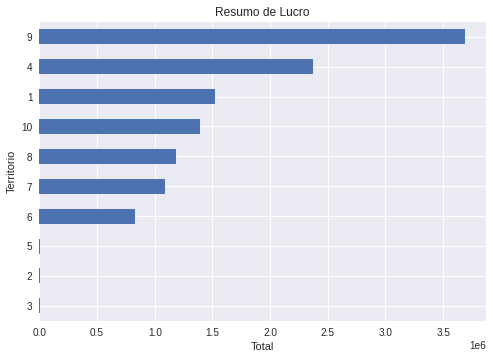

In [ ]:
# exibir grafico de lucro ascendente
df.groupby('SalesTerritoryKey')['LucroTotal'].sum().sort_values(ascending=True).plot.barh(title='Resumo de Lucro')
plt.xlabel('Total')
plt.ylabel('Territorio')

Text(0, 0.5, 'Lucro')

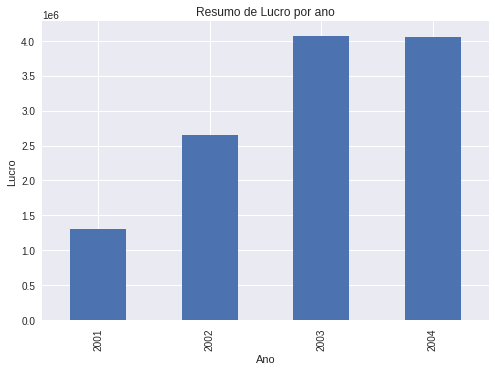

In [ ]:
# grafico de lucro por ano
df.groupby(df['OrderDate'].dt.year)['LucroTotal'].sum().plot.bar(title='Resumo de Lucro por ano')
plt.xlabel('Ano')
plt.ylabel('Lucro')

In [ ]:
# lucro do ano de 2003
lucro_2003 = df[df['OrderDate'].dt.year== 2003]
lucro_2003


,OrderDate,OrderDateKey,ProductKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,ShipDate,OrderQuantity,UnitPrice,...,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,RegionMonthID,CustoTotal,LucroTotal,TotalDias
0,2003-09-29,20030929,528,16115,4,SO55161,1,2003-10-06,1,4.99,...,0,1.87,1.87,4.99,0.40,0.12,Southwest9,1.87,3.12,7
1,2003-10-01,20031001,528,15307,4,SO55352,1,2003-10-08,1,4.99,...,0,1.87,1.87,4.99,0.40,0.12,Southwest10,1.87,3.12,7
2,2003-10-05,20031005,528,16003,4,SO55578,1,2003-10-12,1,4.99,...,0,1.87,1.87,4.99,0.40,0.12,Southwest10,1.87,3.12,7
3,2003-10-06,20031006,528,15883,4,SO55635,1,2003-10-13,1,4.99,...,0,1.87,1.87,4.99,0.40,0.12,Southwest10,1.87,3.12,7
4,2003-10-08,20031008,528,15368,4,SO55767,1,2003-10-15,1,4.99,...,0,1.87,1.87,4.99,0.40,0.12,Southwest10,1.87,3.12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60342,2003-12-14,20031214,480,15295,4,SO60006,2,2003-12-21,1,2.29,...,0,0.86,0.86,2.29,0.18,0.06,Southwest12,0.86,1.43,7
60343,2003-12-19,20031219,480,14593,4,SO60347,2,2003-12-26,1,2.29,...,0,0.86,0.86,2.29,0.18,0.06,Southwest12,0.86,1.43,7
60344,2003-12-25,20031225,480,23483,4,SO60709,2,2004-01-01,1,2.29,...,0,0.86,0.86,2.29,0.18,0.06,Southwest12,0.86,1.43,7
60345,2003-12-25,20031225,480,16242,4,SO60717,2,2004-01-01,1,2.29,...,0,0.86,0.86,2.29,0.18,0.06,Southwest12,0.86,1.43,7


In [ ]:
lucro_ano = df.groupby(df['OrderDate'].dt.year)['LucroTotal'].sum()
# plt.xlabel('Ano')
# plt.ylabel('Lucro')

lucro_ano

OrderDate
2001           1,311,609.47
2002           2,646,853.10
2003           4,072,702.75
2004           4,049,654.51
Name: LucroTotal, dtype: float64

Text(0, 0.5, 'Lucro')

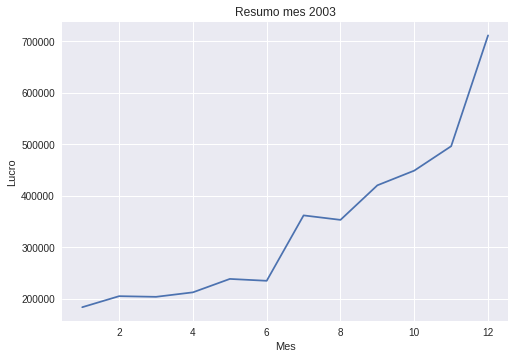

In [ ]:
lucro_2003.groupby(lucro_2003['OrderDate'].dt.month)['LucroTotal'].sum().plot(title="Resumo mes 2003")
plt.xlabel('Mes')
plt.ylabel('Lucro')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

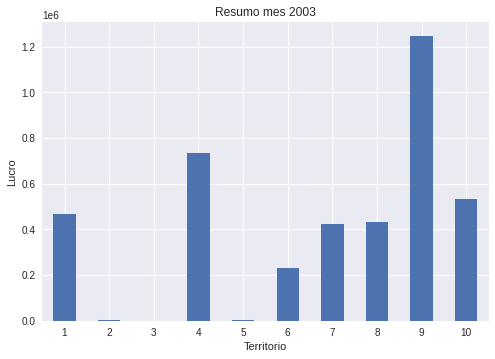

In [ ]:
lucro_2003.groupby(lucro_2003['SalesTerritoryKey'])['LucroTotal'].sum().plot.bar(title="Resumo mes 2003")
plt.xlabel('Territorio')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal')

In [ ]:
# analises estatisticas do total de dias para entrega
df['TotalDias'].describe()

count              60,398.00
mean                    7.00
std                     0.00
min                     7.00
25%                     7.00
50%                     7.00
75%                     7.00
max                     7.00
Name: TotalDias, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f21cf0edb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f21cf18cf50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f21cf151b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f222fef7c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f222fef7750>],
 'means': []}

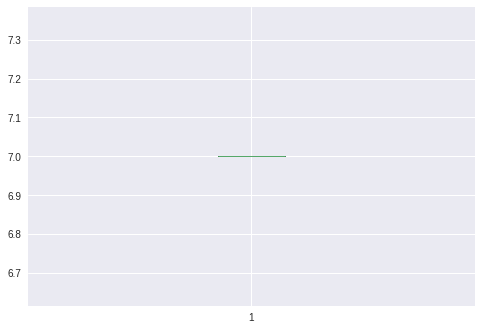

In [ ]:
# grafico de boxplot
plt.boxplot(df['TotalDias'])

(array([    0.,     0.,     0.,     0.,     0., 60398.,     0.,     0.,
            0.,     0.]),
 array([6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5]),
 <a list of 10 Patch objects>)

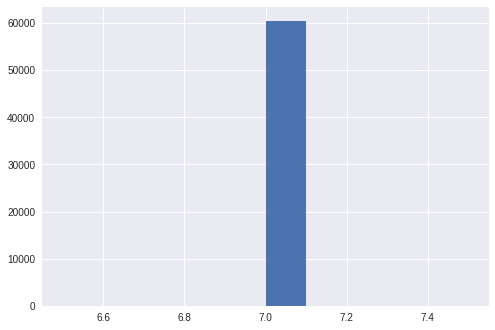

In [ ]:
# histograma
plt.hist(df['TotalDias'])

In [ ]:
# tempo mínimo de envio
df['TotalDias'].min()

7

In [ ]:
# tempo maximo de envio
df['TotalDias'].max()

7

In [ ]:
# identificando qual foi o registro maior registro - o Outlier

df[df['TotalDias']==7]

,OrderDate,OrderDateKey,ProductKey,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,ShipDate,OrderQuantity,UnitPrice,...,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,RegionMonthID,CustoTotal,LucroTotal,TotalDias


In [ ]:
df.to_csv('Analise_lucro.csv', index=False)